# Make Your Pandas Code Lightning Fast

[Make Your Pandas Code Lightning Fast](https://www.youtube.com/watch?v=SAFmrTnEHLg)

Speed up slow pandas/python code by 2500x using this simple trick. Face it, your pandas code is slow. Learn how to speed it up! In this video Rob discusses a key trick to making your code faster! Pandas is an essential tool for any python programmer and data scientist. Using the pandas apply function, using vectorized functions, the speed difference can be significant. Write faster python code.

## Spreed up your Pandas Code!

In [1]:
import pandas as pd
import numpy as np

## Create our dataset

In [2]:
def get_data(size=10_000):
    df = pd.DataFrame()
    df['age']= np.random.randint(1,100,size)
    df['time_in_bed'] = np.random.randint(0,9,size)
    df['pct_sleeping'] = np.random.randint(size)
    df['favorite_food'] = np.random.choice(['pizza', 'taco', 'icecream'],size)
    df['hate_food'] = np.random.choice(['broccoli', 'candy corn', 'eggs'], size)
    return df

In [3]:
df = get_data()
df

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
0,9,5,5384,taco,eggs
1,57,7,5384,pizza,eggs
2,83,4,5384,icecream,candy corn
3,9,3,5384,pizza,eggs
4,50,7,5384,icecream,candy corn
...,...,...,...,...,...
9995,54,2,5384,icecream,eggs
9996,41,3,5384,pizza,broccoli
9997,47,2,5384,taco,candy corn
9998,61,0,5384,taco,candy corn


## The Problem
Reward calculation
- If the were in bed from more than 5 hours AND they were sleeping for more than 50% we give them their favourite food.
- Otherwise we give them their hate food
If they are over 90 years old give their favourite food regardless.

In [4]:
def reward_calc(row):
    if row['age'] >= 90:
        return row['favorite_food']
    if (row['time_in_bed'] > 5) & (row['pct_sleeping'] > 0.5):
        return row['favorite_food']
    return row['hate_food']

## Level 1 - Loop

In [18]:
df=get_data()

In [19]:
%%timeit
for index, row in df.iterrows():
    df.loc[index,'reward'] = reward_calc(row)

585 ms ± 6.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Level 2 - Apply

In [20]:
df=get_data()

In [21]:
%%timeit
df['reward'] = df.apply(reward_calc, axis = 1) # Run thru each row

87.1 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Level 3 - Vectorized

In [22]:
df = get_data()

In [23]:
%%timeit
df['reward'] = df['hate_food']
df.loc[
    ((df['pct_sleeping'] > 0.5) & 
     (df['time_in_bed'] > 5)) | 
     (df['age'] > 90), 
     'reward'] = df['favorite_food'] 

723 µs ± 7.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Level 4 - Numpy

In [36]:
df=get_data()

In [41]:
%%timeit
df['reward'] = np.where(
    ((df['pct_sleeping'] > 0.5) & 
    (df['time_in_bed'] > 5)) | 
    (df['age'] > 90),
    df['favorite_food'],
    df['hate_food']
)

435 µs ± 9.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Plot differences

In [45]:
results = pd.DataFrame(
    [
        ["loop", 585, 6.42],
        ["apply", 87.1, 2.35],
        ["vectorized", 0.723, 7.02/1000],
        ["numpy", 0.435, 9.9/1000]
    ],
    columns = ["type","mean","std"]
)

In [46]:
results

,type,mean,std
0,loop,585.000,6.42000
1,apply,87.100,2.35000
2,vectorized,0.723,0.00702
3,numpy,0.435,0.00990


In [47]:
results['mean'][0]/results['mean'][3]

1344.8275862068965

<AxesSubplot:title={'center':'Time to Run Reward Calc'}, xlabel='type'>

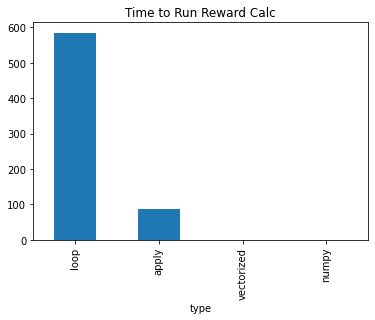

In [48]:
results.set_index('type')['mean'].plot(kind='bar', title='Time to Run Reward Calc')

Try to use vectorized function on pandas as far as possible.